In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import tools
import descartes
import folium
import numpy
import geopy

In [2]:
df=pd.read_csv('414.csv')

In [29]:
gpd.tools.geocode(["Saighan"], "photon")

,geometry,address
0,POINT (70.86977 37.39818),"Kamar Saighan, ولایت بدخشان, افغانستان"


In [3]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

print("\nFirst 5 Rows :  \n",df.head())

print("\nLast 5 Rows :  \n",df.tail())

Rows     :  33285
Columns  :  14

Features : 
 ['radio', 'mcc', 'net', 'area', 'cell', 'unit', 'lon', 'lat', 'range', 'samples', 'changeable', 'created', 'updated', 'averageSignal']

Missing values :   0

Unique values :  
 radio                4
mcc                  1
net                  5
area               534
cell             29414
unit                15
lon               8790
lat              10315
range             1115
samples            226
changeable           1
created          10311
updated           9890
averageSignal        1
dtype: int64

First 5 Rows :  
   radio  mcc  net  area     cell  unit        lon        lat  range  samples  \
0   GSM  414    1  8018    30523     0  97.898483  23.989334   1000        1   
1   GSM  414    1  8018    30441     0  97.898483  23.989334   1000        1   
2  UMTS  414    1  3051  2615926     0  96.118698  19.711427   1000       13   
3  UMTS  414    1  7001   132286     0  96.185715  16.771317   1000        5   
4  UMTS  414    1  700

In [62]:
df['changeable'].min()

1

In [92]:
df2=df.drop_duplicates(subset = ['lon', 'lat'])

In [94]:
df3 = df2.drop_duplicates(subset=['cell'])

In [108]:
df3

,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
0,GSM,414,1,8018,30523,0,97.898483,23.989334,1000,1,1,1459678518,1459678518,0
2,UMTS,414,1,3051,2615926,0,96.118698,19.711427,1000,13,1,1349960430,1349960430,0
3,UMTS,414,1,7001,132286,0,96.185715,16.771317,1000,5,1,1349759072,1349759072,0
4,UMTS,414,1,7001,132283,0,96.187737,16.769569,1000,11,1,1350288985,1378080406,0
5,GSM,414,1,8018,30151,0,97.894167,23.980947,1000,56,1,1360417553,1443871038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33280,LTE,414,9,10744,25929503,0,96.205704,16.895350,1000,1,1,1591098225,1591098225,0
33281,LTE,414,9,10744,25754401,0,96.211517,16.892328,1000,2,1,1591102319,1591104106,0
33282,LTE,414,1,14004,35850005,0,96.478157,18.954763,1000,1,1,1591188233,1591188233,0
33283,UMTS,414,1,556,3618354,0,96.480392,18.958950,1000,1,1,1591530481,1591530481,0


In [107]:
df3

,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
0,GSM,414,1,8018,30523,0,97.898483,23.989334,1000,1,1,1459678518,1459678518,0
2,UMTS,414,1,3051,2615926,0,96.118698,19.711427,1000,13,1,1349960430,1349960430,0
3,UMTS,414,1,7001,132286,0,96.185715,16.771317,1000,5,1,1349759072,1349759072,0
4,UMTS,414,1,7001,132283,0,96.187737,16.769569,1000,11,1,1350288985,1378080406,0
5,GSM,414,1,8018,30151,0,97.894167,23.980947,1000,56,1,1360417553,1443871038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33280,LTE,414,9,10744,25929503,0,96.205704,16.895350,1000,1,1,1591098225,1591098225,0
33281,LTE,414,9,10744,25754401,0,96.211517,16.892328,1000,2,1,1591102319,1591104106,0
33282,LTE,414,1,14004,35850005,0,96.478157,18.954763,1000,1,1,1591188233,1591188233,0
33283,UMTS,414,1,556,3618354,0,96.480392,18.958950,1000,1,1,1591530481,1591530481,0


In [110]:
df3_lon = df3['lon']

In [109]:
df3_lat = df3['lat']

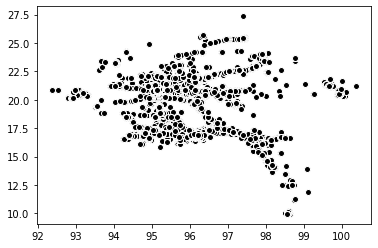

In [111]:
cell_data=plt.scatter(df3_lon, df3_lat, c = 'black', edgecolor = "white")

In [102]:
geo_df = gpd.read_file('mmr_polbnda_adm0_mimu_250k\mmr_polbnda_adm0_mimu_250k.shp')

<AxesSubplot:>

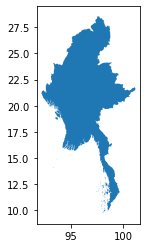

In [172]:
gpf = gpd.read_file("country.geojson")
gpf.plot()

<AxesSubplot:>

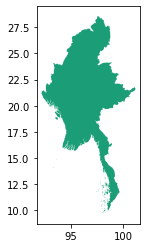

In [114]:
geo_df.plot( legend = True, cmap = 'Dark2')

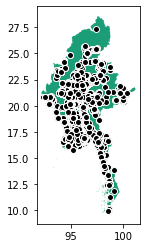

In [115]:
geo_df.plot( legend = True, cmap = 'Dark2')
cell_data=plt.scatter(df3_lon, df3_lat, c = 'black', edgecolor = "white")

In [53]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [224]:
geo_df.geometry

0    MULTIPOLYGON (((97.90662 9.67171, 97.90625 9.6...
Name: geometry, dtype: geometry

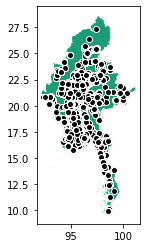

In [106]:
geo_df.plot(legend = True, cmap = 'Dark2')
plt.scatter(df2_lon, df2_lat, c = 'black', edgecolor = "white")

In [134]:
counties_gdf = gpd.read_file('https://storage.googleapis.com/co-publicdata/lm_cnty.zip')

In [197]:
center_point=gpf.centroid

In [198]:
type(center_point)
print(center_point)

0    POINT (96.50761 21.12013)
dtype: geometry


In [221]:
fcenter=[center_point.y, center_point.x]

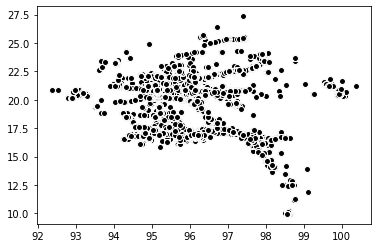

In [228]:
mmap=folium.Map(location = fcenter)
plt.scatter(df2_lon, df2_lat, c = 'black', edgecolor = "white")
display(mmap)